# **Libraries**

In [43]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score,KFold
from sklearn.preprocessing import StandardScaler  
from sklearn.metrics import accuracy_score, f1_score, roc_auc_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import LabelEncoder
from xgboost import plot_importance, XGBRegressor
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier

# **Importing the data**

### Load data

In [44]:
df = pd.read_csv("/content/Churn.csv")

# **Understanding the data**

### Explore data and check some statistics

In [45]:
df.shape

(7043, 21)

In [46]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [47]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [48]:
set(df.dtypes.tolist())

{dtype('int64'), dtype('float64'), dtype('O')}

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


Let's check some statistics of the numerical features

In [50]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
SeniorCitizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
MonthlyCharges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75


# **Data Manipulation**

This CustomerID column is irrelevant to the data and has no significant value that can contribute to classification, so remove it from the data.

In [51]:
df.drop('customerID', axis=1, inplace=True)

From the displayed some rows of the data above,  it shows that *TotalCharges* has values of *float* data type but it shows the *object*. Change it *object* to *float*.

In [52]:
df['TotalCharges'] = pd.to_numeric(df['TotalCharges'], errors='coerce')

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 20 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   gender            7043 non-null   object 
 1   SeniorCitizen     7043 non-null   int64  
 2   Partner           7043 non-null   object 
 3   Dependents        7043 non-null   object 
 4   tenure            7043 non-null   int64  
 5   PhoneService      7043 non-null   object 
 6   MultipleLines     7043 non-null   object 
 7   InternetService   7043 non-null   object 
 8   OnlineSecurity    7043 non-null   object 
 9   OnlineBackup      7043 non-null   object 
 10  DeviceProtection  7043 non-null   object 
 11  TechSupport       7043 non-null   object 
 12  StreamingTV       7043 non-null   object 
 13  StreamingMovies   7043 non-null   object 
 14  Contract          7043 non-null   object 
 15  PaperlessBilling  7043 non-null   object 
 16  PaymentMethod     7043 non-null   object 


### Check if missing value exist in any column

In [54]:
df.isnull().values.any()

True

From the info of the data, we can say that the missing Value seems to exist in the *TotalCharges* variable. So to apply Imputation each missing value will be replaced with the mean value of *TotalCharges*.

In [55]:
df['TotalCharges'] = df['TotalCharges'].fillna(df['TotalCharges'].mean())

In [56]:
df.isnull().values.any()

False

The reason of *mean* is used for missing value is because it is a better option to use mean as it at least is a better *representative* of a feature than zero. Why?

* Because for continuous/numeric features no matter how many times we add mean, it still gets conserved also when it comes to calculating the mean of the observed values for the variable for all individuals which are non-missing.

* It has the advantage of keeping the same mean and the same sample sizes. 

* In addition, putting zero would not be helped in our case, because putting zero in our row means the *TotalCharges* is zero which means it's free and no company provide wireless service for free. So it's the best solution to use mean where we don't lose much information and neither ruins the performance of the model.

### Find out the relationships among the target variable (*Churn*) and other predictor variables.

In [59]:
(df.corr())["Churn"].sort_values(ascending = False)[1:]

MonthlyCharges    0.193356
SeniorCitizen     0.150889
TotalCharges     -0.199428
tenure           -0.352229
Name: Churn, dtype: float64

From the above results, we can conclude that the target variable has no strong correlation with any feature (independent variable)

(i.e., abs(corr) >= 0.5)

### Label Encoding dependent variable from Yes/No to 1/0.

In [57]:
le = LabelEncoder()
df['Churn'] = le.fit_transform(df['Churn'])

For now only, from all the categorical variable dependent variable (*Churn*) is handled using *Label Encoding* beacuse for other features we need labels of all other variable in its original form for data analysis.

# **Data Visulization**

Let's visualize the correlations between numerical features of the data.

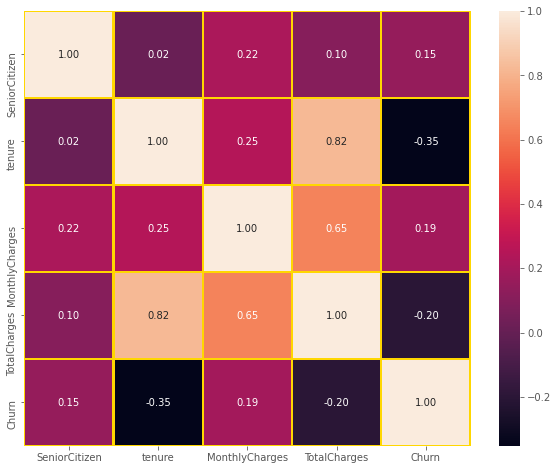

In [58]:
plt.style.use("ggplot")
f,ax=plt.subplots(figsize = (10,8))
sns.heatmap(df.corr(),robust=True,fmt='.2f',linewidths=1.3,linecolor = 'gold', annot=True,);

From the above graph, we can say that no 2 independent variables have a correlation >= 0.90. So, no 2 independent variables have much dependency on each other and we do not need to remove any.

### Visualizing the correlation between all Categorical Variable and dependent variable (Churn)

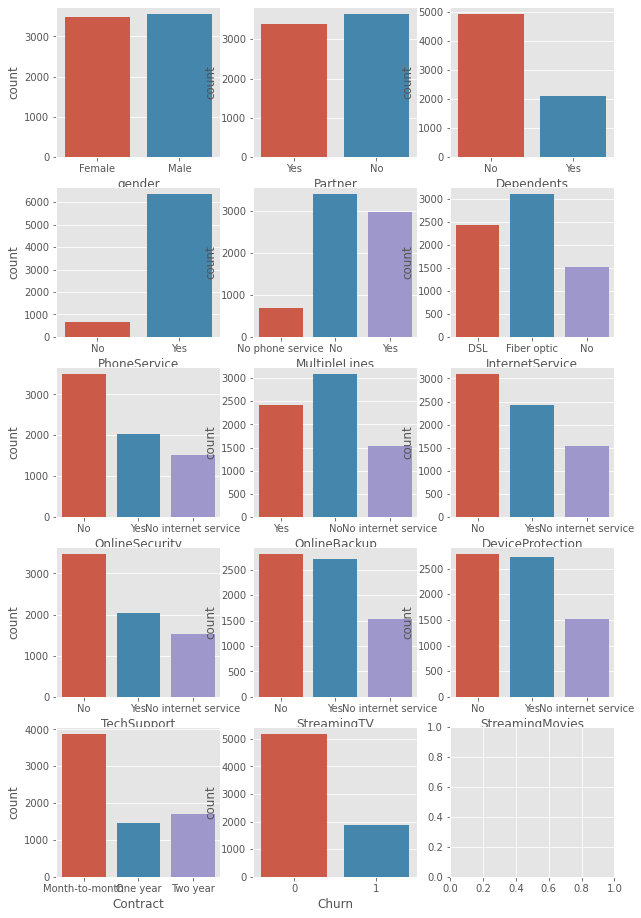

In [60]:
fig, ax =plt.subplots(5,3,figsize=(10,16))

sns.countplot(x = df['gender'], ax=ax[0][0])
sns.countplot(x = df['Partner'], ax=ax[0][1])
sns.countplot(x= df['Dependents'], ax=ax[0][2])

sns.countplot(x = df['PhoneService'], ax=ax[1][0])
sns.countplot(x = df['MultipleLines'], ax=ax[1][1])
sns.countplot(x = df['InternetService'], ax=ax[1][2])

sns.countplot(x = df['OnlineSecurity'], ax=ax[2][0])
sns.countplot(x = df['OnlineBackup'], ax=ax[2][1])
sns.countplot(x = df['DeviceProtection'], ax=ax[2][2])

sns.countplot(x = df['TechSupport'], ax=ax[3][0])
sns.countplot(x = df['StreamingTV'], ax=ax[3][1])
sns.countplot(x = df['StreamingMovies'], ax=ax[3][2])

sns.countplot(x = df['Contract'], ax=ax[4][0])
sns.countplot(x = df['Churn'], ax=ax[4][1])

fig.show()

A little bit more females seem to remain with Company. Customer who is provided with Phone service is a bit more likely to stay on Company. Customers with Fiber optic InternetService have a huge probability to stay in Company. Customers with no Online Security have a higher chance to remain with Company. Customer with OnlineBackup tends to have higher chance to stay with the company. Customers with no DeviceProtection have a higher chance to remain with the company. Senior Citizens seem to stay with Company more than the younger generation.

### Visualizing the correlation between all Numeric Variable and dependent variable (Churn)

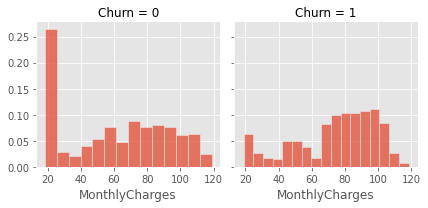

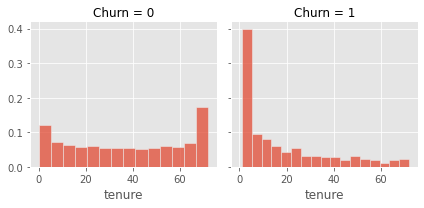

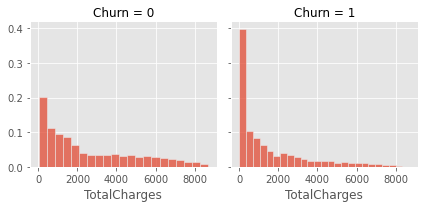

In [61]:
g= sns.FacetGrid(df, col = "Churn")
g.map(sns.histplot, "MonthlyCharges", stat = 'probability')
plt.show()

g= sns.FacetGrid(df, col = "Churn")
g.map(sns.histplot, "tenure", stat = 'probability')
plt.show()

g= sns.FacetGrid(df, col = "Churn")
g.map(sns.histplot, "TotalCharges", stat = 'probability')
plt.show()

### Checking outliers through box-plot

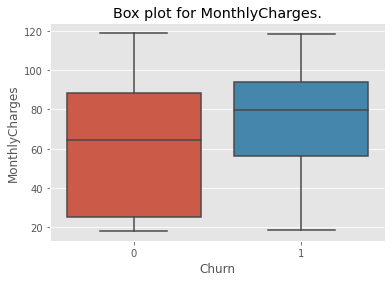

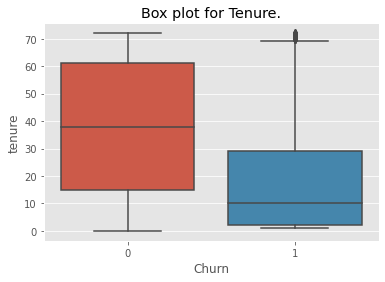

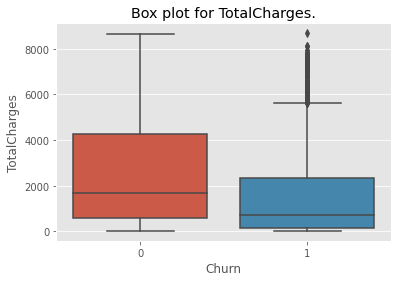

In [62]:
sns.boxplot(x='Churn', y='MonthlyCharges', data=df).set_title("Box plot for MonthlyCharges.")
plt.show()

sns.boxplot(x='Churn', y='tenure', data=df).set_title("Box plot for Tenure.")
plt.show()

sns.boxplot(x='Churn', y='TotalCharges', data=df).set_title("Box plot for TotalCharges.")
plt.show()

Observation of Outliers: 

* As we can see from the box plots, there are no outliers in *MonthlyCharges*.

* There is barely any outlier in the *tenure* feature where Churn is 1, but those are very less and very close to the upper bound. So, we can ignore that. 

* There exist some outliers in the *TotalCharges* in Churn=1, as shown above but as there are many it can be useful information.

### To deal with Categorical Variables, I use Dummy variables to incorporate nominal variables into a binary value.

In [63]:
df = pd.get_dummies(df)

In [64]:
df.head()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,Churn,gender_Female,gender_Male,Partner_No,Partner_Yes,Dependents_No,Dependents_Yes,PhoneService_No,PhoneService_Yes,MultipleLines_No,MultipleLines_No phone service,MultipleLines_Yes,InternetService_DSL,InternetService_Fiber optic,InternetService_No,OnlineSecurity_No,OnlineSecurity_No internet service,OnlineSecurity_Yes,OnlineBackup_No,OnlineBackup_No internet service,OnlineBackup_Yes,DeviceProtection_No,DeviceProtection_No internet service,DeviceProtection_Yes,TechSupport_No,TechSupport_No internet service,TechSupport_Yes,StreamingTV_No,StreamingTV_No internet service,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_No internet service,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaperlessBilling_No,PaperlessBilling_Yes,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,0,1,29.85,29.85,0,1,0,0,1,1,0,1,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0
1,0,34,56.95,1889.50,0,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,1,0,0,0,0,1,1,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1
2,0,2,53.85,108.15,1,0,1,1,0,1,0,0,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1
3,0,45,42.30,1840.75,0,0,1,1,0,1,0,1,0,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,1,0,0,1,0,0,0,1,0,1,0,1,0,0,0
4,0,2,70.70,151.65,1,1,0,1,0,1,0,0,1,1,0,0,0,1,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0,0,0,1,0,0,1,0


By converting the categorical columns into one hot encoding, model can interpret the categorical variable as numbers. It will add new binary feature with [0, 1] values that our model can interpret. 


Why *Label Encoding* is not used?

*  When *label Encoding* is performed, the names are ranked based on the alphabets when there are more than 2 unique values in categorical feature. Due to this, there is a very high probability that the model captures the relationship between categories.
* While *One-Hot Encoding* creates additional features based on the number of unique values in the categorical feature. Every unique value in the category will be added as a feature.

# **Implement Machine Learning Models**

### Splitting the data as train and validation data

In [65]:
xs = df.drop(["Churn"], axis=1)
target = df["Churn"]
x_train, x_test, y_train, y_test = train_test_split(xs, target, test_size = 0.30, random_state=19)

In [66]:
r = 1309

models = [LogisticRegression(random_state=r, solver='lbfgs', max_iter=1000), KNeighborsClassifier(), RandomForestClassifier()]

names = ["LogisticRegression", "KNN", "Random Forest"]

Default model validation accuracies for the train data:

LogisticRegression: 
 Accuracy : 0.808329389493611 
 F1 score : 0.599406528189911 
 AUC score : 0.7238715609062207


KNN: 
 Accuracy : 0.7619498343587316 
 F1 score : 0.4914054600606673 
 AUC score : 0.6576223849009472


Random Forest: 
 Accuracy : 0.7960246095598675 
 F1 score : 0.5694305694305695 
 AUC score : 0.705087950595011




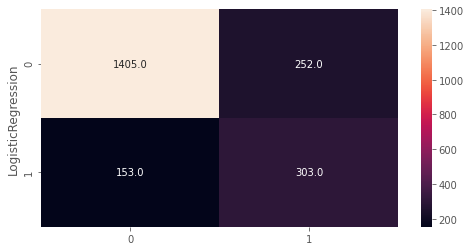

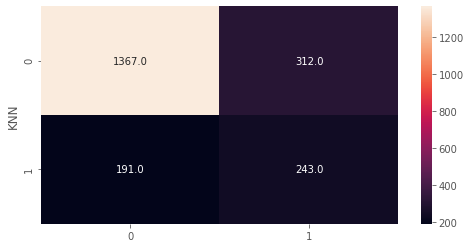

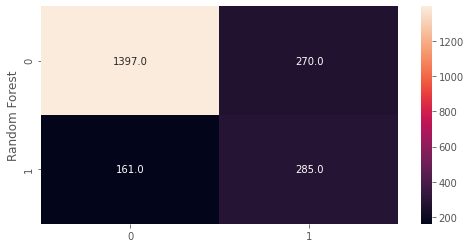

In [67]:
print('Default model validation accuracies for the train data:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    print(name + ': \n Accuracy : {} \n F1 score : {} \n AUC score : {}'.format(accuracy_score(y_pred, y_test), f1_score(y_test,y_pred), roc_auc_score(y_test, y_pred)))
    print('\n')
    cnf = confusion_matrix(y_pred, y_test)
    plt.figure(figsize = (8,4))
    sns.heatmap(cnf, annot=True, fmt = '.1f')
    plt.ylabel(name)

From the above result and confusion matrix, we can say that Logistic Regression (LR) is performing better than K-Nearest Neighbors (KNN) and Random Forest (RF).

Reason for the same can be as following:
*   Logistic Regression (LR) can perform better than K-Nearest Neighbors (KNN) when data is linear, that is the same case here. In addition, LR can derive confidence level or probability (about its prediction), whereas KNN can only output the labels.
*   Regarding Random Forest (RF), also it can work better than Logistic Regression (LR) when data is linear. In aadition, the major reason RF is perfomming slightly lower than LR is more number of features and less amount data. RF needs more data to learn as it has many parameters.

--> However, if we can select the best parameters, RF can also performs better.

# **Model Evaluation**

GridSearch is applied to check the consistency and to do more evaluation of the model.

GridSearchCV method can helps to loop through all the parameters and fit the estimator (model) on the training set. So, in the end, we can select the best parameters from the listed parameters.

### Parameters of all 3 used models

In [69]:
logreg_params= {"C":np.logspace(-1, 1, 10),
                    "penalty": ["l1","l2"], "solver":['lbfgs', 'liblinear', 'sag', 'saga'], "max_iter":[1000]}

knn_params= {"n_neighbors": np.linspace(1,19,10, dtype = int).tolist(),
                 "weights": ["uniform","distance"],
                 "metric":["euclidean","manhattan"]}

RF_params = {"max_features": ["log2","auto","sqrt"],
                "min_samples_split":[2,3,5],
                "min_samples_leaf":[1,3,5],
                "bootstrap":[True,False],
                "n_estimators":[50,100,150],
                "criterion":["gini","entropy"]}

classifier_params = [logreg_params, knn_params, RF_params]

### Grid Search (to find best parameters for all models)

In [70]:
import time
from contextlib import contextmanager

@contextmanager
def timer(title):
    t0 = time.time()
    yield
    print("{} done in {:.0f}s".format(title, time.time() - t0))

cv_result = {}
best_estimators = {}
for name, model,classifier_param in zip(names, models,classifier_params):
    with timer(">Model tuning"):
        clf = GridSearchCV(model, param_grid=classifier_param, cv=10, scoring='accuracy', n_jobs=-1, verbose=False)
        clf.fit(x_train,y_train)
        cv_result[name]=clf.best_score_
        best_estimators[name]=clf.best_estimator_
        print(name,'cross validation accuracy : %.3f'%cv_result[name])

LogisticRegression cross validation accuracy : 0.804
>Model tuning done in 692s
KNN cross validation accuracy : 0.786
>Model tuning done in 15s
Random Forest cross validation accuracy : 0.799
>Model tuning done in 1603s


Validation accuracies of the tuned models for the train data:

LogisticRegression : 0.807
KNN : 0.781
Random Forest : 0.810


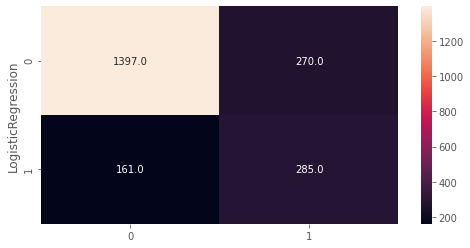

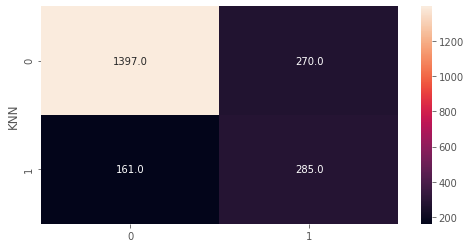

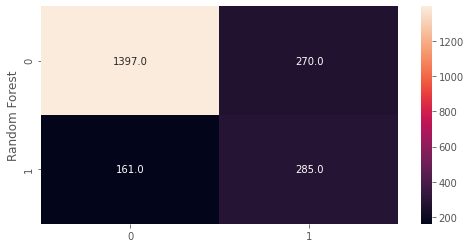

In [71]:
accuracies = {}
print('Validation accuracies of the tuned models for the train data:', end = "\n\n")
for name, model_tuned in zip(best_estimators.keys(),best_estimators.values()):
    y_pred =  model_tuned.fit(x_train,y_train).predict(x_test)
    accuracy=accuracy_score(y_pred, y_test)
    print(name,':', "%.3f" %accuracy)
    accuracies[name]=accuracy
    plt.figure(figsize = (8,4))
    sns.heatmap(cnf, annot=True, fmt = '.1f')
    plt.ylabel(name)

From the boave, result we can say that if we find the best parameters, we can gain more accuracy and fitting the model again with best estimator.

# **Final Conclusion**

### **Feature importance**

[18:19:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


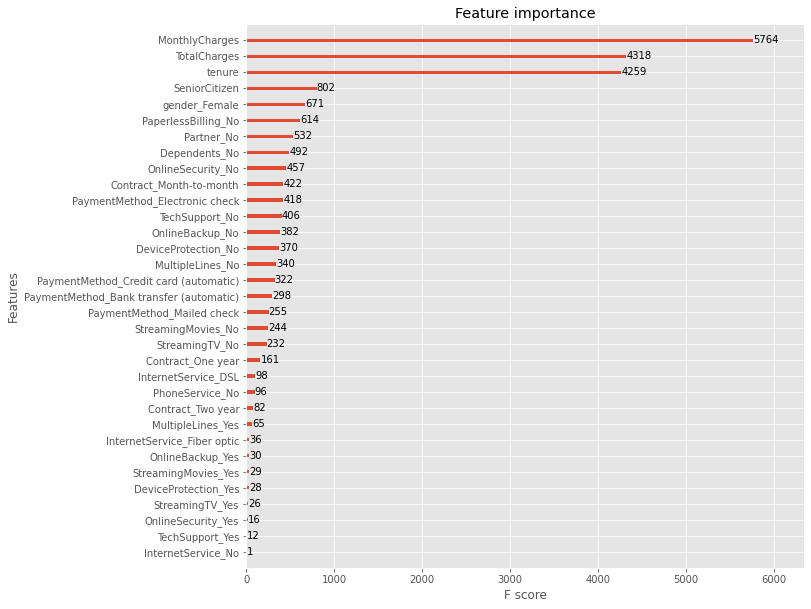

In [72]:
xgb = XGBRegressor(max_depth = 10, random_state = 42)
xgb.fit(df.loc[:, df.columns != 'Churn'], df['Churn'])
fig, ax = plt.subplots(1, 1, figsize=(10, 10))
impplot = plot_importance(xgb, ax = ax)
plt.show()

Default model validation accuracies for the train data:

LogisticRegression: 
 Accuracy : 0.7917652626597255 
 F1 score : 0.5358649789029536 
 AUC score : 0.6842203564283154



KNN: 
 Accuracy : 0.7638428774254614 
 F1 score : 0.48503611971104227 
 AUC score : 0.6542662688362304



Random Forest: 
 Accuracy : 0.7605300520586843 
 F1 score : 0.4878542510121458 
 AUC score : 0.6554996588372711





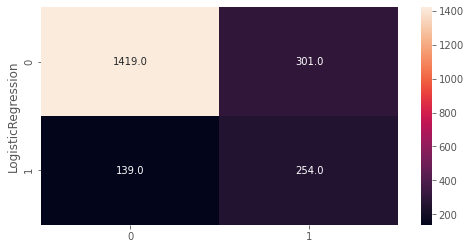

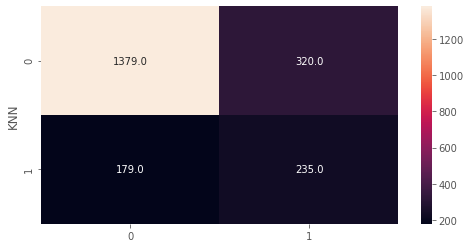

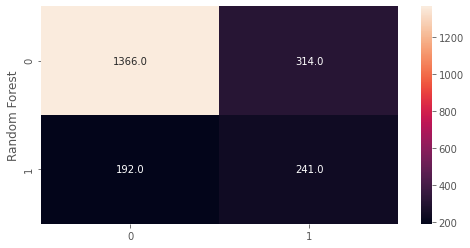

In [73]:
xs = df[['MonthlyCharges', 'tenure', 'TotalCharges']]
target = df["Churn"]
x_train, x_test, y_train, y_test = train_test_split(xs, target, test_size = 0.30, random_state=19)

print('Default model validation accuracies for the train data:', end = "\n\n")
for name, model in zip(names, models):
    model.fit(x_train, y_train)
    y_pred = model.predict(x_test) 
    print(name + ': \n Accuracy : {} \n F1 score : {} \n AUC score : {}'.format(accuracy_score(y_pred, y_test), f1_score(y_test,y_pred), roc_auc_score(y_test, y_pred)))
    print('\n\n')
    cnf = confusion_matrix(y_pred, y_test)
    plt.figure(figsize = (8,4))
    sns.heatmap(cnf, annot=True, fmt = '.1f')
    plt.ylabel(name)

From feature importance, we have seen that MonthlyCharges, tenure TotalCharges have a high contribution to Classification. And from the relationship between our dependent variable and numeric variable we have seen that customers with fewer monthly charges have a higher probability to stay with the company, a customer with tenure less than 20, and customers with Monthly charges around 60-80 have a higher probability to stay with the company. These three are the key factors to predict customer churn.

#### Conclusion:

*  For any data, we cannot say that - which Machine Learning model is going to perform best, it always depends on the data and after doing the data analysis and data cleaning, we can get more clear information about data and can select at least models which can try for our data. 
* In addition, using various cross-validation techniques we can check the consistency of the model for the given data, and using methods like GridSearch, we can find the best parameters from our model and improve the performance.
* Here, I have used the GridSearchCV method to find the best parameter for the models and after that results are as following: 
 
Validation accuracies of the tuned models for the train data:
1. LogisticRegression : 0.807
2. KNN: 0.781
3. Random Forest: 0.810
   
